<a href="https://colab.research.google.com/github/Bharath1330/CODETECH-Task2/blob/main/Unsupervised_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

**Loading Data set**

In [ ]:
data = pd.read_csv("insurance.csv")

**Process the data**

In [ ]:
data = pd.get_dummies(data, columns=['sex',
 'smoker', 'region'])


**Scaling**

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


**K-means Clustering**

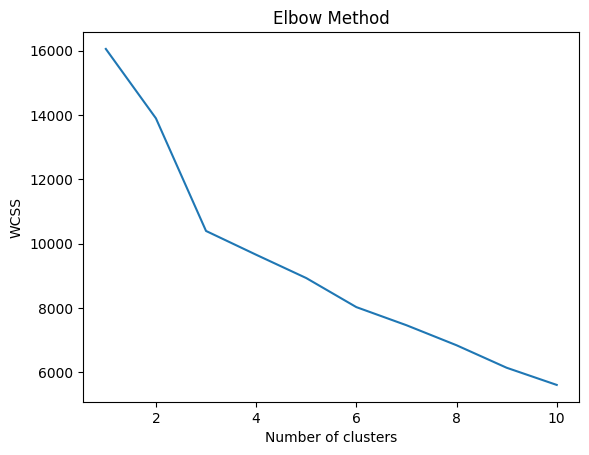

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
 init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**no.of clusters**

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_data, labels)
davies_bouldin_index = davies_bouldin_score(scaled_data, labels)
print("K-Means Silhouette Score:", silhouette_avg)
print("K-Means Davies-Bouldin Index:", davies_bouldin_index)

K-Means Silhouette Score: 0.2184705010233862
K-Means Davies-Bouldin Index: 1.713599127934591


**Hierarchical Clustering**

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical.fit(scaled_data)
labels_hierarchical = hierarchical.labels_
silhouette_avg_hierarchical = silhouette_score(scaled_data, labels_hierarchical)
davies_bouldin_index_hierarchical = davies_bouldin_score(scaled_data, labels_hierarchical)
print("Hierarchical Clustering Silhouette Score:", silhouette_avg_hierarchical)
print("Hierarchical Clustering Davies-Bouldin Index:", davies_bouldin_index_hierarchical)


Hierarchical Clustering Silhouette Score: 0.18227499906810238
Hierarchical Clustering Davies-Bouldin Index: 2.04283178510374


**PCA Dimensionality reduction**

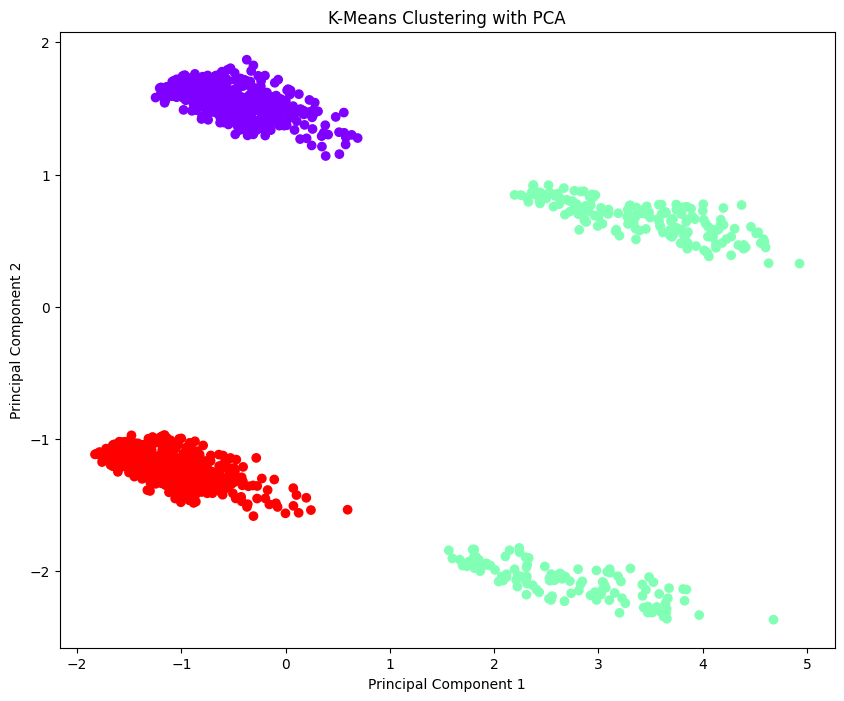

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=labels, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()
